In [1]:
import os
import json
import csv
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [17]:
data = []
count = {}

startrun = 8
endrun = 11
data = agg_data(startrun,endrun)

for item in data:
    url = item['img_url']
    hash_ = item['img_hash']

    cat = url.split("_")[3]
    num = int(url.split("_")[2])
    
    if(num not in count):
        count[num] = {}

    if(cat not in count[num]):
        count[num][cat] = set()
        #count[num][cat] = []

    count[num][cat].add(hash_)
    #count[num][cat].append(hash_)

In [13]:
def agg_data(s,e):
    
    data = []
    for i in range(s,e):
        temp = []
        for item in os.listdir("."):
            if("run{}".format(str(i)) in item):
                with open(item,'r') as file:
                    temp = json.load(file)
        data = data + temp
    return data

###  The structure of count is:

count =

        5 = 
        
        {
            'health': set(h1,h2,h3),
            'sports': set(h1,h2,h3),
        }
        
        10 =
        
        {
            'sports': set(h1,h2,h3),
            'health': set(h1,h2,h3),
        }

Adult


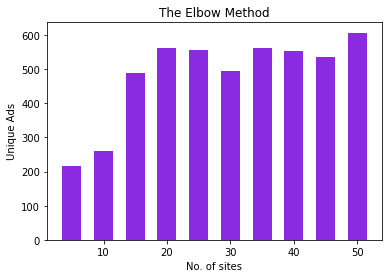

Sports


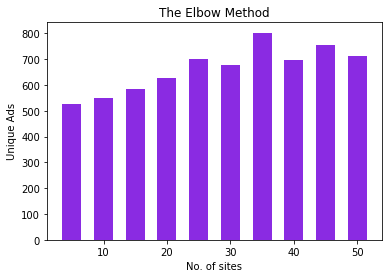

Health


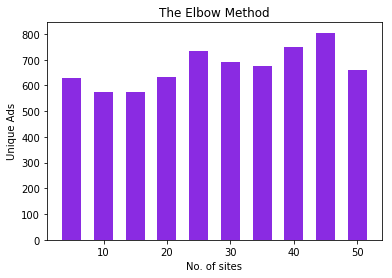

Games


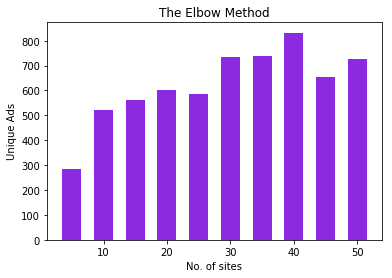

Recreation


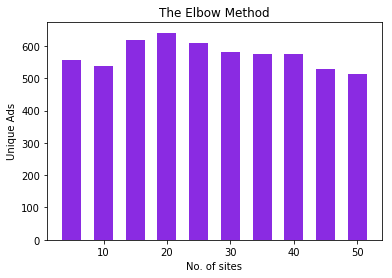

News


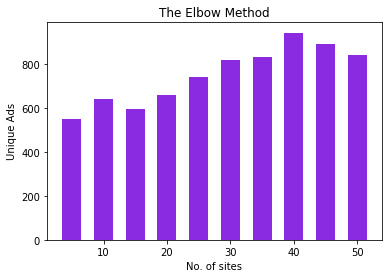

<Figure size 432x288 with 0 Axes>

In [18]:
personas = ["Adult","Sports","Health","Games","Recreation","News"]
no_site  = [5,10,15,20,25,30,35,40,45,50]
colors   = ['bx-','gx-','rx-','cx-','mx-','yx-','bx-','gx-','rx-','cx-']
data = {}
for cindex,p in enumerate(personas):
    data[p] = {}
    y = []
    u = []
    print(p)
    for index,s in enumerate(no_site):
        
        d = count[s][p]
        c = count[s][p]
        l = 0
        if(index != 0):
            
            prev_c = data[p][no_site[index - 1]]["combined_hashes"]
            l = len(d) - len(d.intersection(prev_c))
            c = d.union(prev_c)
        
        data[p][s] = {"combined_hashes":d}
        
        y.append(l)
        u.append(len(d))
        
    
    plt.bar(no_site,u, 3, color='blueviolet')
    plt.ylabel('Unique Ads')
    plt.xlabel('No. of sites')
    
#     axes2 = plt.twinx()
#     plt.plot(no_site, y, colors[cindex])
#     axes2.set_ylabel('New Ads')
    
    plt.title('The Elbow Method')
    plt.show()
    plt.savefig('images/{}.png'.format(p))
    
    
    

      0    1    2    3    4    5
5   217  525  629  285  555  548
10  261  549  575  522  538  642
15  490  585  575  563  618  594
20  562  628  633  601  641  658
25  557  703  735  584  609  740
30  496  676  691  733  581  816
35  562  803  674  739  574  829
40  553  696  748  832  575  941
45  537  756  805  654  529  891
50  607  712  659  728  513  840


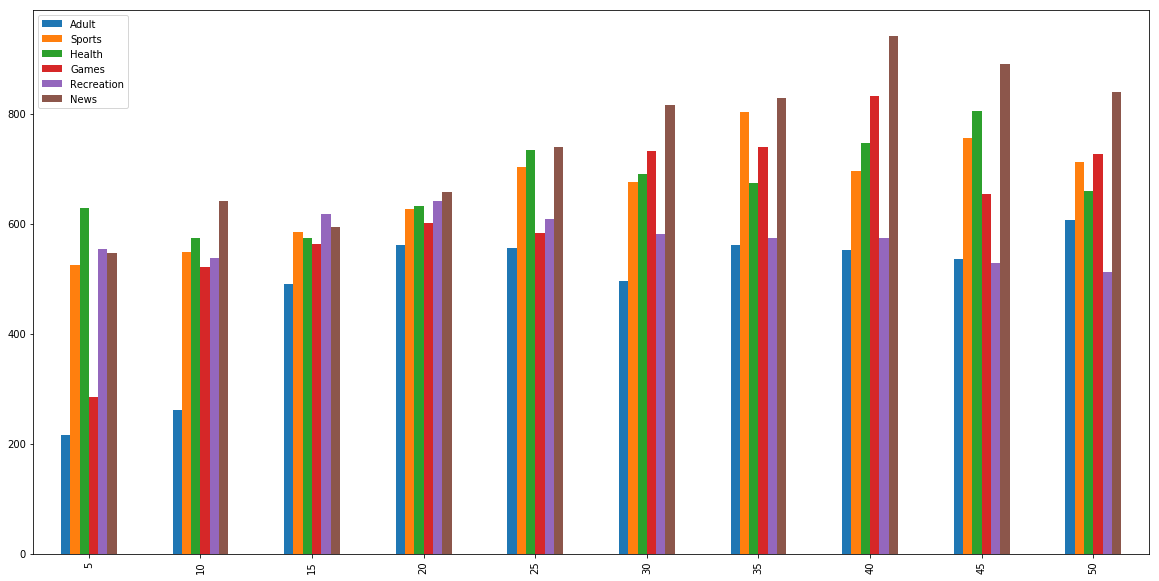

In [21]:
import numpy as np
import matplotlib.pyplot as plt

X = [5,10,15,20,25,30,35,40,45,50]
Y = []
personas = ["Adult","Sports","Health","Games","Recreation","News"]

for k1 in X:
    plty = []
    for k2 in personas:
        plty.append(len(count[k1][k2]))
    Y.append(plty)

df = pd.DataFrame(Y, index=X)
print(df)
ax = df.plot.bar(figsize=(20,10))
ax.legend(personas);
plt.savefig('images/combined.png')
plt.show()